In [1]:
%matplotlib inline
import os 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

Text(0.5,0,'Some Parameter')

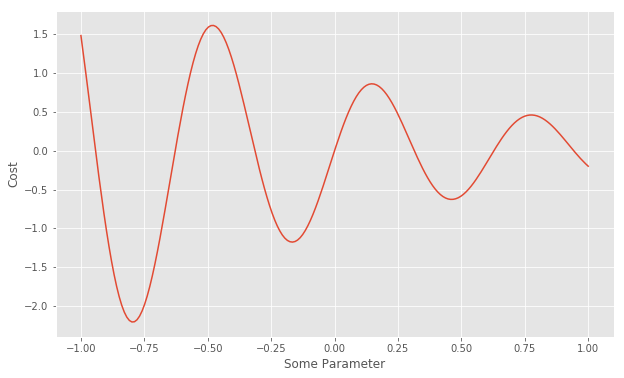

In [13]:

# example cost function
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

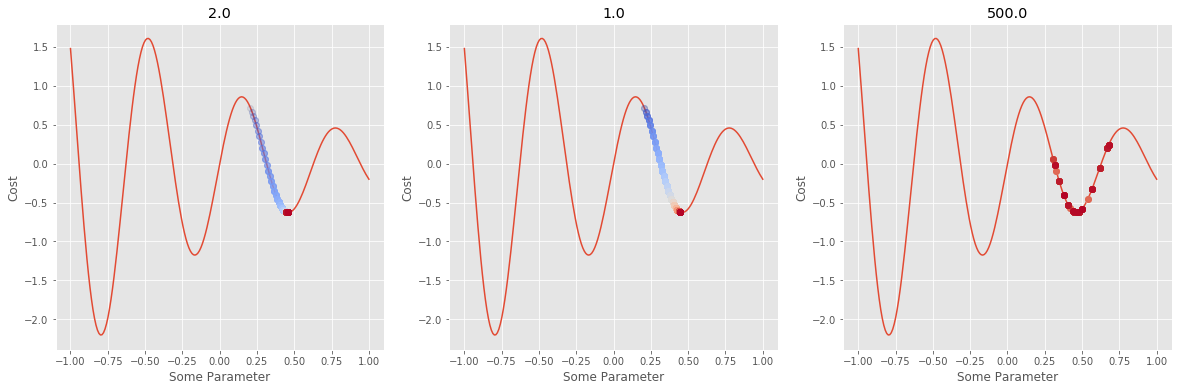

In [27]:
#following the negative gradient of the cost function

gradient = np.diff(cost)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([2.0, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    
    cost = np.sin(hz*x)*np.exp(-x)
    
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    
    n_iterations = 500
    
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    
    # initial parameter value
    init_p = 120 #np.random.randint(len(x)*0.2, len(x)*0.8)
    
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

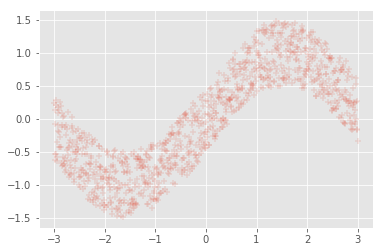

In [57]:
####### TRYING TO BUILD SIMPLE NETWORK #####

# start session
sess = tf.InteractiveSession()

# number of samples
n_observations = 1000

# test input
xs = np.linspace(-3,3,n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)

plt.scatter(xs, ys, alpha=0.15, marker='+')

(array([   5.,   26.,   89.,  175.,  221.,  231.,  162.,   66.,   22.,    3.]),
 array([-0.30283141, -0.24123904, -0.17964666, -0.11805429, -0.05646192,
         0.00513045,  0.06672283,  0.1283152 ,  0.18990757,  0.25149995,
         0.31309232]),
 <a list of 10 Patch objects>)

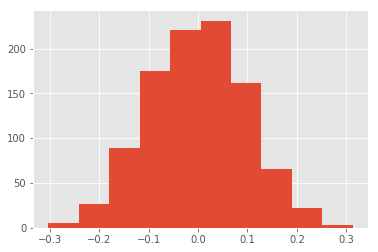

In [21]:
##### DEFINING COST #####
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')
 

In [28]:
#weights
W = tf.Variable(tf.random_normal([1],dtype=tf.float32,stddev=0.1),name='weight')

# bias 
B = tf.Variable(tf.constant([0],dtype=tf.float32),name='Bias')

# now we can scale our input placeholder by W, and add our bias b.
Y_pred = X * W + B

# measures absolute distance
def distance(p1,p2):
    return tf.abs(p1-p2)

# defining this cost function - now take output of network and known target value and ask for distance between them
cost = distance(Y_pred,Y)

# need to sum over every possible observation to account for different sized batches
cost = tf.reduce_mean(distance(Y_pred,Y))

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.799891
0.61548
0.506516
0.454316
0.433017
0.424983
0.420678
0.418628
0.41798
0.417654
0.417433
0.417338
0.41731
0.41729
0.417271


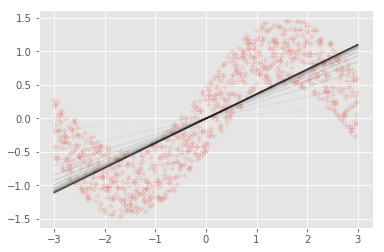

In [33]:
# add optimizer
optimizer = tf.train.GradientDescentOptimizer (learning_rate=0.01).minimize(cost)

# set the number of iterations / epochs
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')


with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

In [55]:

### STOCHASTIC + MINI BATCH GRADIENT DESCENT ###

# this splits a simple array of 100 values into more 
# bite sized chunks of 10 values per set.
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size


# show random and normal order batching. 
# In some cases, random order may turn out to be exactly what we want to do. 
# For instance, if we want to learn about how something changes over time, 
# like audio, or letters or words in a sequence which form sentences. 


print("Normal batching\n")
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

print("\n==========\n")

# same thing but initialized with random values
idxs = np.arange(100)

# randomize values we assign for each batch
idxs = np.random.permutation(idxs)

batch_size = 10
n_batches = len(idxs) // batch_size

print("Batching - but initialzing with random values\n")
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])


Normal batching
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


Batching - but initialzing with random values
[39 59 15 81  5  2 51 11 53 73]
[98 14 76 41 90 52 94 24 60 40]
[84 62 63  1 19 97  7 29 82 79]
[65 36 21 33 80 46 48 88 95 89]
[31 58  3 83 49 69 35 57 37 70]
[54 43 20 34 16 92 42 30 44  9]
[32 67 10 99 77 85 22 86 64 26]
[47 18 87 27  0 28 68 50 17 93]
[12  4 96 72 25 91 61 56 71 13]
[23  6 66 38 45  8 75 55 74 78]


0.544404
0.464555
0.428305
0.411568
0.404444
0.401186
0.399888
0.399483
0.399291
0.399172
0.399102
0.399053
0.399028
0.399026
0.399025
0.399025
0.399024
0.399023
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022
0.399022


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


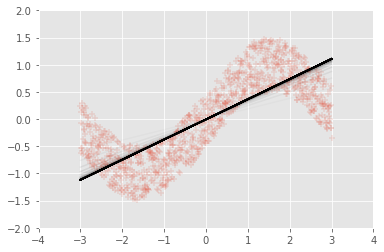

In [58]:
# integrating mini-batching into previous code

batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        
        # train using mini-batch gradient descent
        # The resulting process is also know as Mini-Batch Gradient Descent, 
        # since we are taking smaller batches of our data and performing gradient descent.
        # Further, it is Stochastic, meaning the order of the data presented is randomized, 
        # and is also commonly referred to as Stochastic Gradient Descent. 
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
fig.show()
plt.draw()